In [1]:
%matplotlib inline
import random
import jax
import numpy as np
from jax import numpy as jnp
from matplotlib import pyplot as plt

## A Simple Example: Tossing Coins

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [44, 56]


In [3]:
fair_probs = [0.5, 0.5]
np.random.multinomial(100, fair_probs)

array([49, 51])

In [4]:
np.random.multinomial(100, fair_probs) / 100

array([0.42, 0.58])

In [5]:
counts = np.random.multinomial(10000, fair_probs).astype(np.float32)
counts / 10000

array([0.4994, 0.5006], dtype=float32)

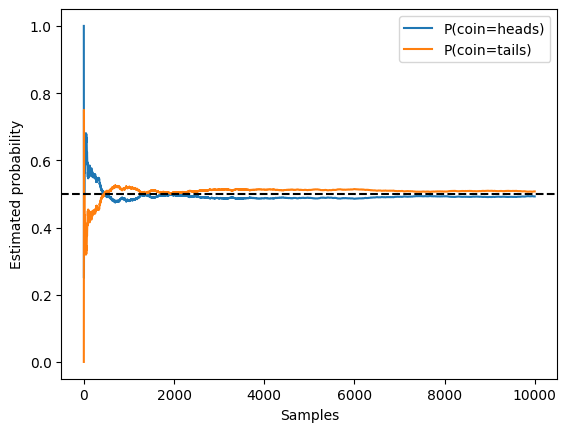

In [6]:
counts = np.random.multinomial(1, fair_probs, size=10000).astype(np.float32)
cum_counts = counts.cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend()